# Abstract
The goal of this project was to demonstrate a linear regression on a given dataset. One of the initial challenges of this project was understanding what qualites to look for in a dataset for a this task. While prioritizeing continous data over categorical data helped, the most important technique was looking at coorelations to narrow variable choices. From both a cost and ellegance perspective, this was a far superior strategy to running a brute force approach to finding variables of interest.

Currentlty, the biggest challenge is trying to understand how well the model performed. As you will find, the regression line visually matches the overall trend, but there is a decent amount of variablility that simply cannot be captured with a simple linear regression. There were 11 other features that were avaible, but not included because of the model chosen.

The model was able to account for 49% of the variance in the data, implying that this model is proably best suited to be descriptive model, rather than a predictive on this particular dataset. Moving foward, it would be interesting to see how regressing with multiple features effect the model.

# Importing Data and Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

feature = "density"
target = "alcohol"
color_var = "quality"

data = pd.read_csv("../CSV/winequality-both_cleaned.csv")
display(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6487,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6488,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6489,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


# Looking at Coorelation to Identify Variables of Interest
Look at the correlation in terms of magnitude, alcohol has the strongest correlation with density. The negative simply means that as one value increases the other deacreases, and visa versa.

In [2]:
data_corr = data.corr()["alcohol"]
print(data_corr)

fixed acidity          -0.099398
volatile acidity       -0.038578
citric acid            -0.012092
residual sugar         -0.365754
chlorides              -0.257997
free sulfur dioxide    -0.179664
total sulfur dioxide   -0.265404
density                -0.702899
pH                      0.122194
sulphates              -0.004412
alcohol                 1.000000
quality                 0.445687
Name: alcohol, dtype: float64


# Linear Regression Model (score of .49)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data[feature])
Y = pd.DataFrame(data[target])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)
model = LinearRegression()
model = model.fit(X_train, Y_train) 
print(model.score(X_train, Y_train))

probs = model.predict(X_test)

Y["alc_pred"] = model.predict(X)

0.49031138946905695


# Scatter Plot and a Line of Best Fit Using Model Above

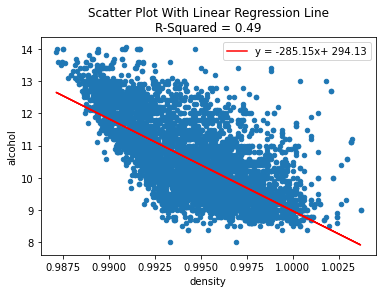

In [13]:
# Scatter plot
plot = data.plot.scatter(x=feature,y=target)

# Line of best fit
m, b, r_value, p_value, std_err = stats.linregress(X[feature], Y[target])
plot_bf = plt.plot(X, Y["alc_pred"], color="red")
plt.legend(plot_bf, ["y = {}x+ {}".format(round(m,2), round(b, 2))])

plt.title("Scatter Plot With Linear Regression Line\nR-Squared = {}".format(round(r_value**2,2)))
plt.show()